In [1]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/users/anshumantewary/Downloads/Projects/Python - Kidney Diesease Classification/kidney_disease.csv')

In [4]:
df.head(5)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<AxesSubplot:>

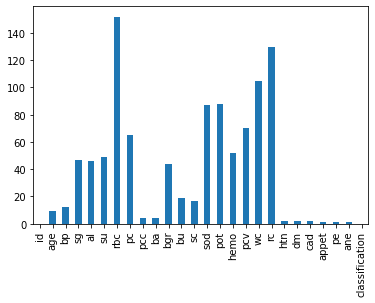

In [6]:
  df.isnull().sum().plot(kind = 'bar')

**Data Pre-processing**

In [7]:
data_def = pd.read_csv('/users/anshumantewary/Downloads/Projects/Python - Kidney Diesease Classification/data_description.txt', sep = '-')

data_def.head()
data_def.reset_index()

index             1. Features:
0               id                        id
1              age                       age
2               bp            blood pressure
3               sg          specific gravity
4               al                   albumin
5               su                     sugar
6              rbc           red blood cells
7               pc                  pus cell
8              pcc           pus cell clumps
9               ba                  bacteria
10             bgr      blood glucose random
11              bu                blood urea
12              sc          serum creatinine
13             sod                    sodium
14             pot                 potassium
15            hemo               haemoglobin
16             pcv        packed cell volume
17              wc    white blood cell count
18              rc      red blood cell count
19             htn               ypertension
20              dm         diabetes mellitus
21             cad   coronary artery disease
22           appet                  appetite
23              pe               pedal edema
24             ane                    anemia
25  classification                     class

In [8]:
data_def['1. Features:'].values

array(['id', 'age', 'blood pressure', 'specific gravity', 'albumin',
       'sugar', 'red blood cells', ' pus cell', 'pus cell clumps',
       'bacteria', 'blood glucose random', 'blood urea',
       'serum creatinine', 'sodium', 'potassium', 'haemoglobin',
       'packed cell volume', 'white blood cell count',
       'red blood cell count', 'ypertension', 'diabetes mellitus',
       'coronary artery disease', 'appetite', 'pedal edema', 'anemia',
       'class'], dtype=object)

In [9]:
## Lets first change the dataset columns as per the description text provided

In [10]:
df.columns = data_def['1. Features:'].values

In [11]:
df.head()

id   age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0   0  48.0            80.0             1.020      1.0    0.0             NaN   
1   1   7.0            50.0             1.020      4.0    0.0             NaN   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  ...  packed cell volume  \
0    normal      notpresent  notpresent  ...                  44   
1    normal      notpresent  notpresent  ...                  38   
2    normal      notpresent  notpresent  ...                  31   
3  abnormal         present  notpresent  ...                  32   
4    normal      notpresent  notpresent  ...                  35   

   white blood cell count  red blood cell count  ypertension  \
0                    7800                   5.2          yes   
1                    6000                   NaN           no   
2                    7500                   NaN           no   
3                    6700                   3.9          yes   
4                    7300                   4.6           no   

   diabetes mellitus  coronary artery disease appetite pedal edema anemia  \
0                yes                       no     good          no     no   
1                 no                       no     good          no     no   
2                yes                       no     poor          no    yes   
3                 no                       no     poor         yes    yes   
4                 no                       no     good          no     no   

  class  
0   ckd  
1   ckd  
2   ckd  
3   ckd  
4   ckd  

[5 rows x 26 columns]

## **Missing value identification**

In [12]:
categorical = df.select_dtypes('object').isnull().sum()

In [13]:
categorical = df.select_dtypes('object').columns.values

In [14]:
categorical

array(['red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'packed cell volume', 'white blood cell count',
       'red blood cell count', 'ypertension', 'diabetes mellitus',
       'coronary artery disease', 'appetite', 'pedal edema', 'anemia',
       'class'], dtype=object)

In [15]:
df[categorical]

red blood cells  pus cell pus cell clumps    bacteria packed cell volume  \
0               NaN    normal      notpresent  notpresent                 44   
1               NaN    normal      notpresent  notpresent                 38   
2            normal    normal      notpresent  notpresent                 31   
3            normal  abnormal         present  notpresent                 32   
4            normal    normal      notpresent  notpresent                 35   
..              ...       ...             ...         ...                ...   
395          normal    normal      notpresent  notpresent                 47   
396          normal    normal      notpresent  notpresent                 54   
397          normal    normal      notpresent  notpresent                 49   
398          normal    normal      notpresent  notpresent                 51   
399          normal    normal      notpresent  notpresent                 53   

    white blood cell count red blood cell count ypertension diabetes mellitus  \
0                     7800                  5.2         yes               yes   
1                     6000                  NaN          no                no   
2                     7500                  NaN          no               yes   
3                     6700                  3.9         yes                no   
4                     7300                  4.6          no                no   
..                     ...                  ...         ...               ...   
395                   6700                  4.9          no                no   
396                   7800                  6.2          no                no   
397                   6600                  5.4          no                no   
398                   7200                  5.9          no                no   
399                   6800                  6.1          no                no   

    coronary artery disease appetite pedal edema anemia   class  
0                        no     good          no     no     ckd  
1                        no     good          no     no     ckd  
2                        no     poor          no    yes     ckd  
3                        no     poor         yes    yes     ckd  
4                        no     good          no     no     ckd  
..                      ...      ...         ...    ...     ...  
395                      no     good          no     no  notckd  
396                      no     good          no     no  notckd  
397                      no     good          no     no  notckd  
398                      no     good          no     no  notckd  
399                      no     good          no     no  notckd  

[400 rows x 14 columns]

In [16]:
df['red blood cells'].value_counts()

normal      201
abnormal     47
Name: red blood cells, dtype: int64

In [17]:
#df['red blood cells'] = pd.to_numeric(df['red blood cells'], errors='coerce').notnull()

In [18]:
 #In order to impute the missing values, we can use a library from sklearn

In [19]:
#from sklearn.impute import SimpleImputer 

In [20]:
#imputer = SimpleImputer(strategy = 'constant', fill_value='Missing')

In [21]:
#df['red blood cells'] = imputer.fit_transform(df[['red blood cells']])

In [22]:
#df['red blood cells'].value_counts()

Since, the count of missing values is high, we are not removing them, rather imputing them into a categorical value 'Missing"

In [23]:
#def missing_imputer(df, feature):
  #df[feature] = imputer.fit_transform(df[[feature]])

In [24]:
#missing_imputer(df, 'white blood cell count')

In [25]:
#df['diabetes mellitus'].value_counts()

Let us identify the categorical variables with the count of categorical variables

In [26]:
def count_values(df, feature):
  print("The feature we are looking at is:  {}".format(feature))
  print('\n')
  print("The total count of values this feature has is : {}".format(df[feature].value_counts().count()))
  print("-----------------------------------------------------------------------------------------------------------------------")


In [27]:
features = ['red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'packed cell volume', 'white blood cell count',
       'red blood cell count', 'ypertension', 'diabetes mellitus',
       'coronary artery disease', 'appetite', 'pedal edema', 'anemia']

In [28]:
for i in features:
  count_values(df, i)

The feature we are looking at is:  red blood cells


The total count of values this feature has is : 2
-----------------------------------------------------------------------------------------------------------------------
The feature we are looking at is:   pus cell


The total count of values this feature has is : 2
-----------------------------------------------------------------------------------------------------------------------
The feature we are looking at is:  pus cell clumps


The total count of values this feature has is : 2
-----------------------------------------------------------------------------------------------------------------------
The feature we are looking at is:  bacteria


The total count of values this feature has is : 2
-----------------------------------------------------------------------------------------------------------------------
The feature we are looking at is:  packed cell volume


The total count of values this feature has is : 44
--------------

What we are observing is that we have 2 types of categorical features, one with <=5 value types and other with >5 value types.

Based on this differentiation, we will apply different methods to encode them into numerical features, which will be then processed

In [29]:
#For features with value counts > 5; let's examine each of them

#Starting with white blood cell count

In [30]:
#index_missing_WBC_count = df[df['white blood cell count'].isnull() == True]['white blood cell count'].index.tolist() 

#These are the index of the missing values in the above feature
#index_missing_WBC_count 

In [31]:
#df['white blood cell count'].value_counts()

In [32]:
#df['white blood cell count'] = pd.to_numeric(df['white blood cell count'], errors = 'coerce')

In [33]:
#df['white blood cell count'].fillna(value = np.mean(df['white blood cell count']), inplace = True)

In [34]:
#df['white blood cell count'].fillna(value = np.nanmedian(df['white blood cell count']), inplace=True)

In [35]:
#We replaced it with median value becasue median is not affected by outliers

In [36]:
#df['white blood cell count'].iloc[6]

# Distribution of categorical variable: Ordinal and Nominal

In [37]:
def to_nominal(df, feature):
    df[feature] = pd.to_numeric(df[feature], errors = 'coerce')

In [38]:
nominal_features = ['white blood cell count', 'red blood cell count', 'packed cell volume' ]

for i in nominal_features:
    to_nominal(df, i)

In [39]:
#df['packed cell volume'].isnull().sum() #Checking

In [40]:
# For the remaining features, which may be classified as ordinal features, 
# what we can do is replace the missing values with the most occuring ones in the feature


In [41]:
#def to_ordinal(df, feature):
    #df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

In [42]:
#to_ordinal(df,'red blood cells')

In [43]:
#df['red blood cells'].value_counts()

In [44]:
#ordinal = df.select_dtypes('object').columns.values.tolist()

In [45]:
#ordinal

#This also proves that we have converted the other features to numeric types

In [46]:
#for i in ordinal:
    #to_ordinal(df, i)

In [47]:
categorical_values = [col for col in df.columns if df[col].dtype == 'object']

In [48]:
categorical_values

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [49]:
#Now lets print the unique values present here

In [50]:
def unique_values(df, feature):
    print('{} has {} values'.format(feature, df[feature].unique()))
    print('\n')
    

In [51]:
for i in categorical_values:
    unique_values(df, i)

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [52]:
## diabetes mellitus, coronary artery disease, class has unclear values...

#Lets correct them first

In [53]:
df['diabetes mellitus'].replace(to_replace= {'\tno' : 'no', '\tyes':'yes'}, inplace = True)

In [54]:
df['coronary artery disease'].replace(to_replace= {'\tno':'no'}, inplace = True)

In [55]:
df['class'].replace(to_replace= {'ckd\t':'ckd'}, inplace = True)

In [56]:
for i in categorical_values:
    unique_values(df, i)

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




In [57]:
# All values are cleaned

In [58]:
df.drop('id', inplace = True, axis = 1)

# Analysing distribution of numerical & categorical features

### Numerical features

In [59]:
num_col = [col for col in df.columns if df[col].dtype!= 'object']

In [60]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [61]:
#Lets start plotting, the distribution of each num_col wrt to the outcome variable

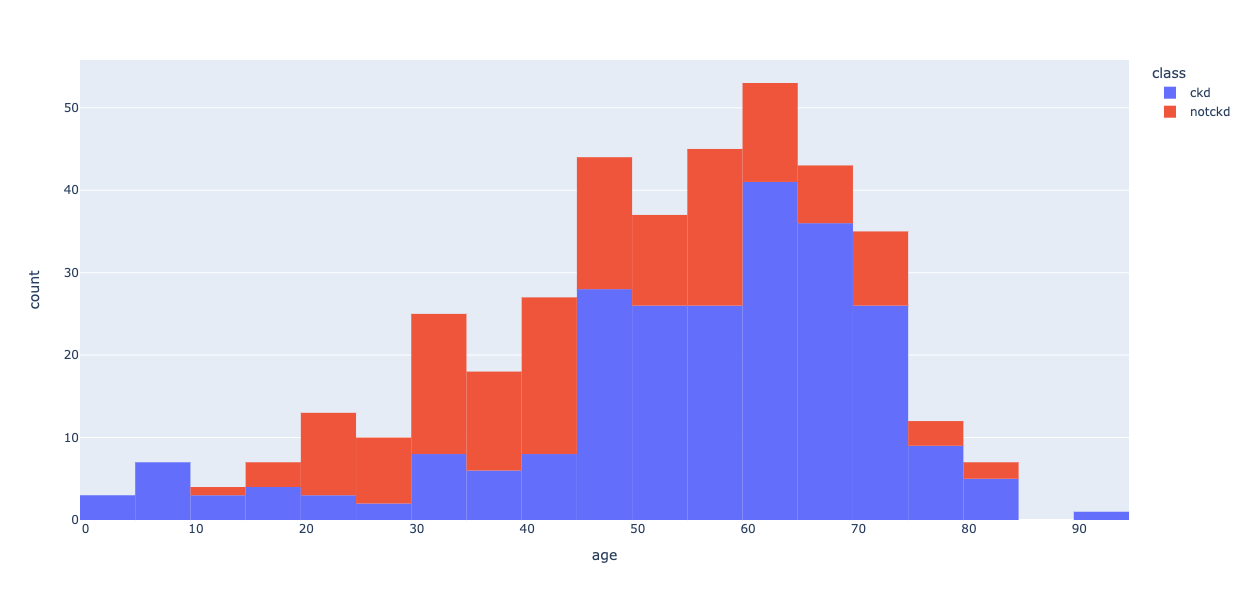

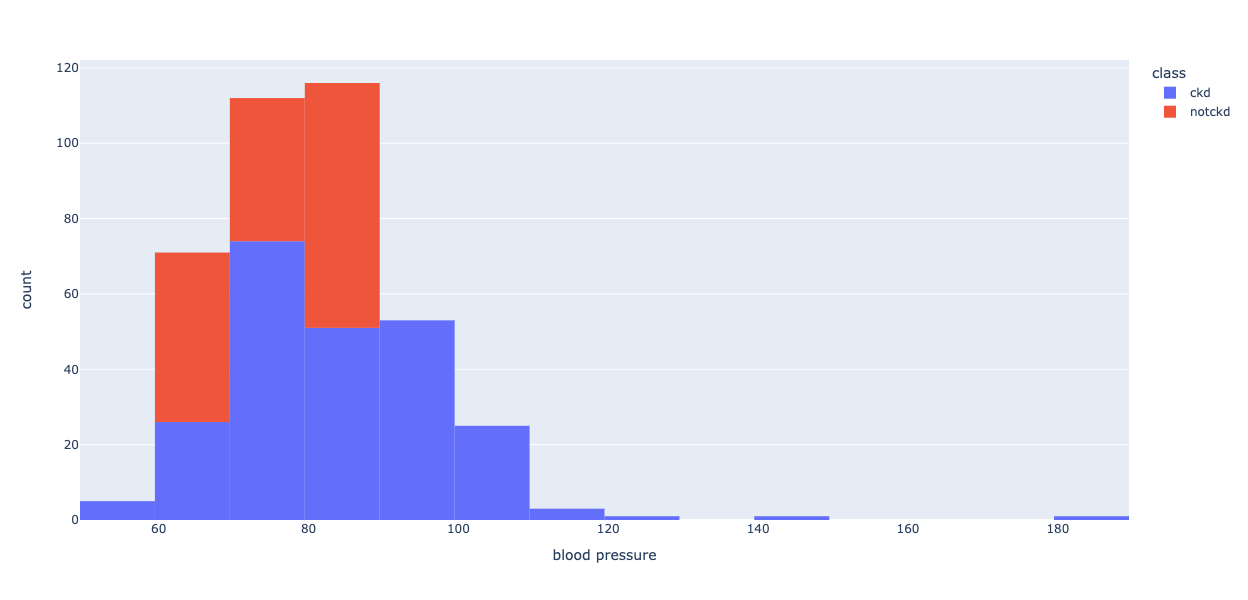

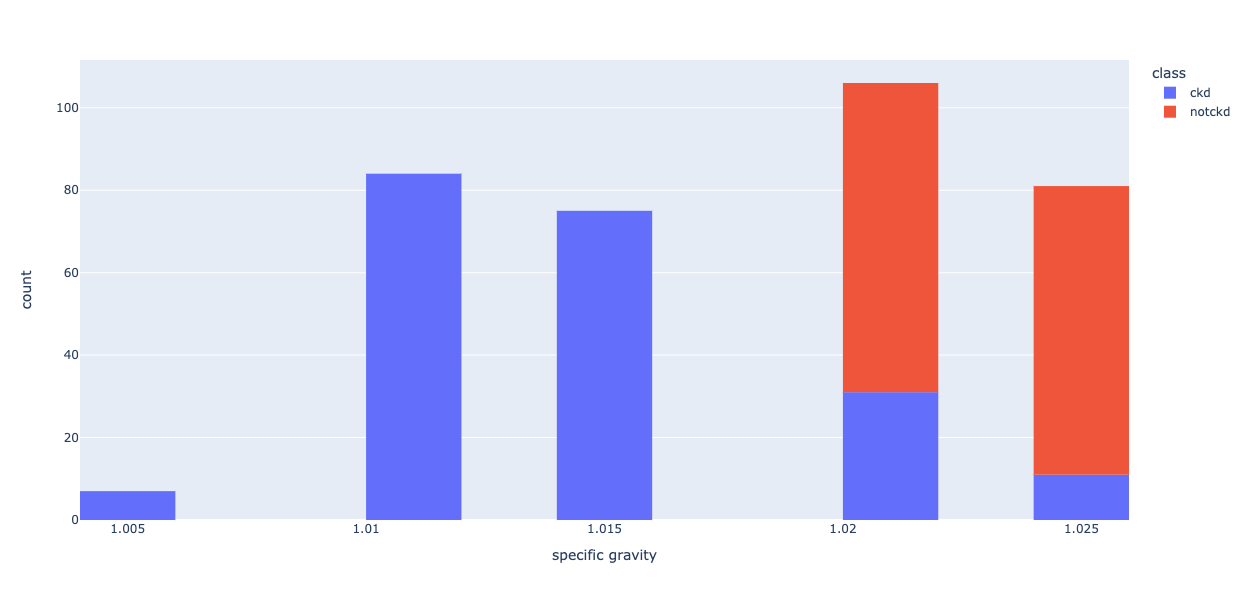

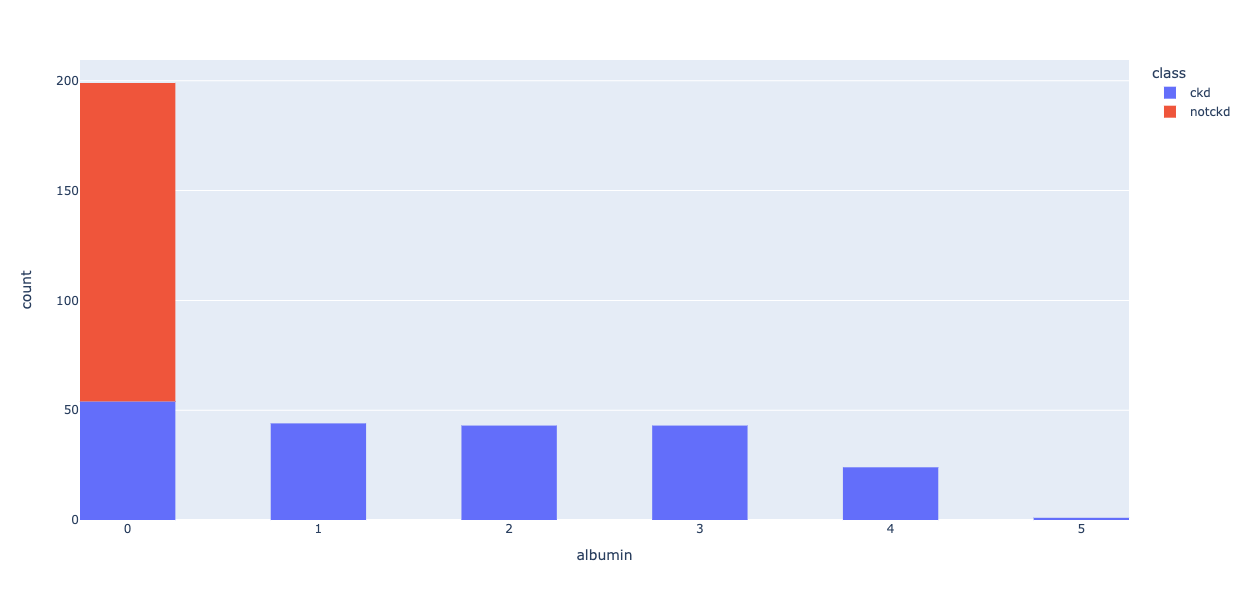

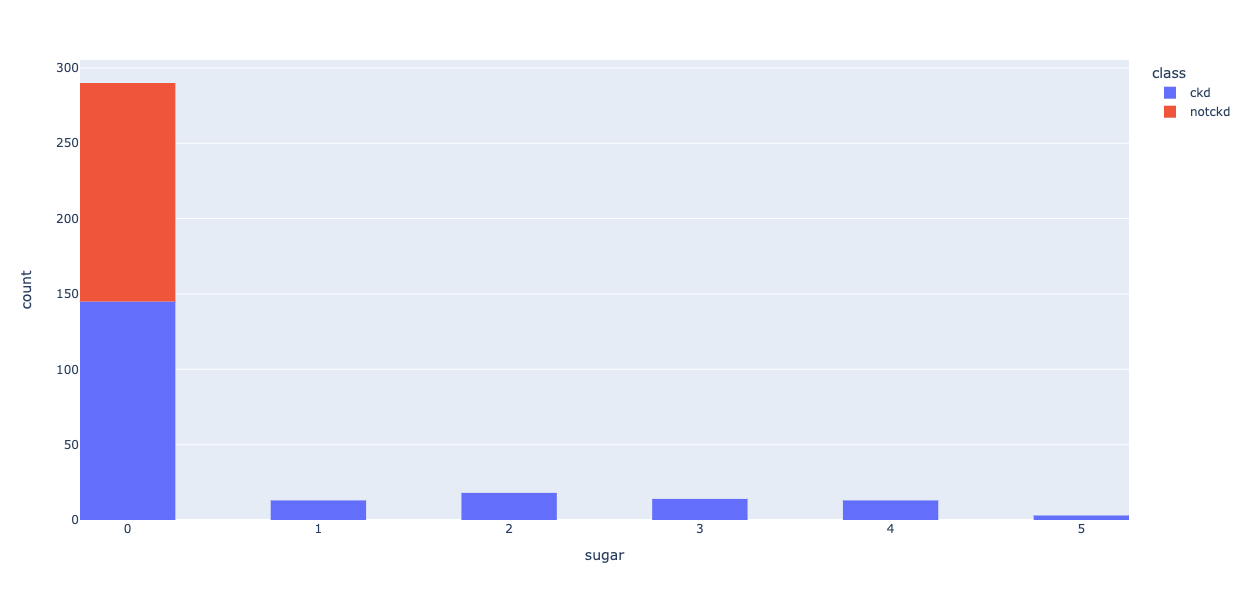

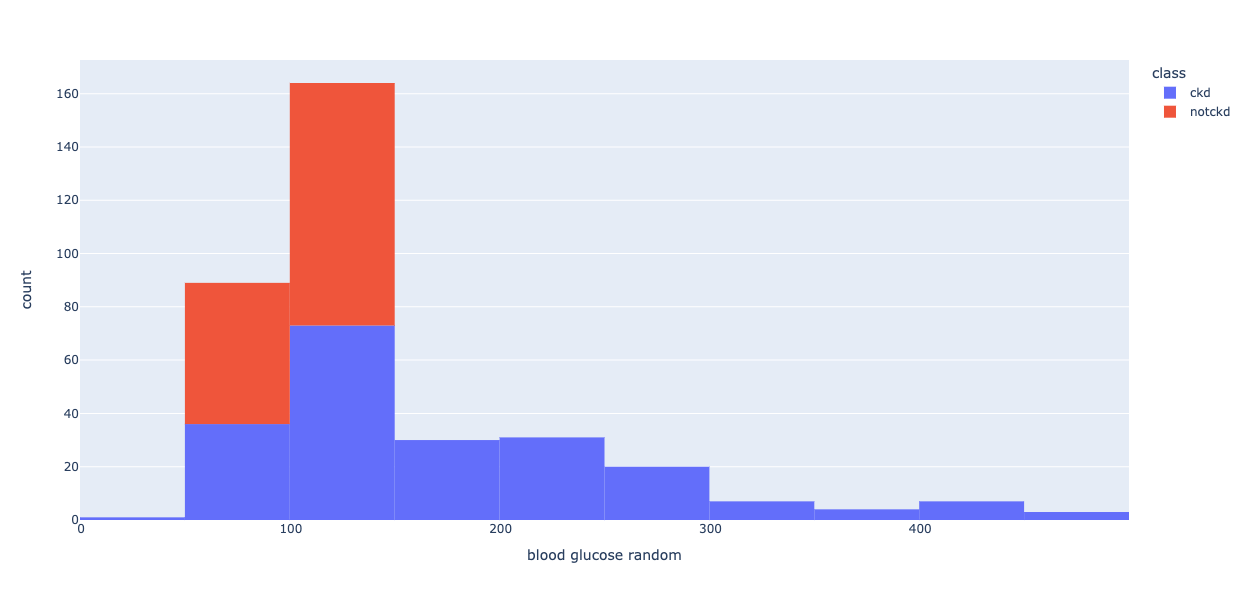

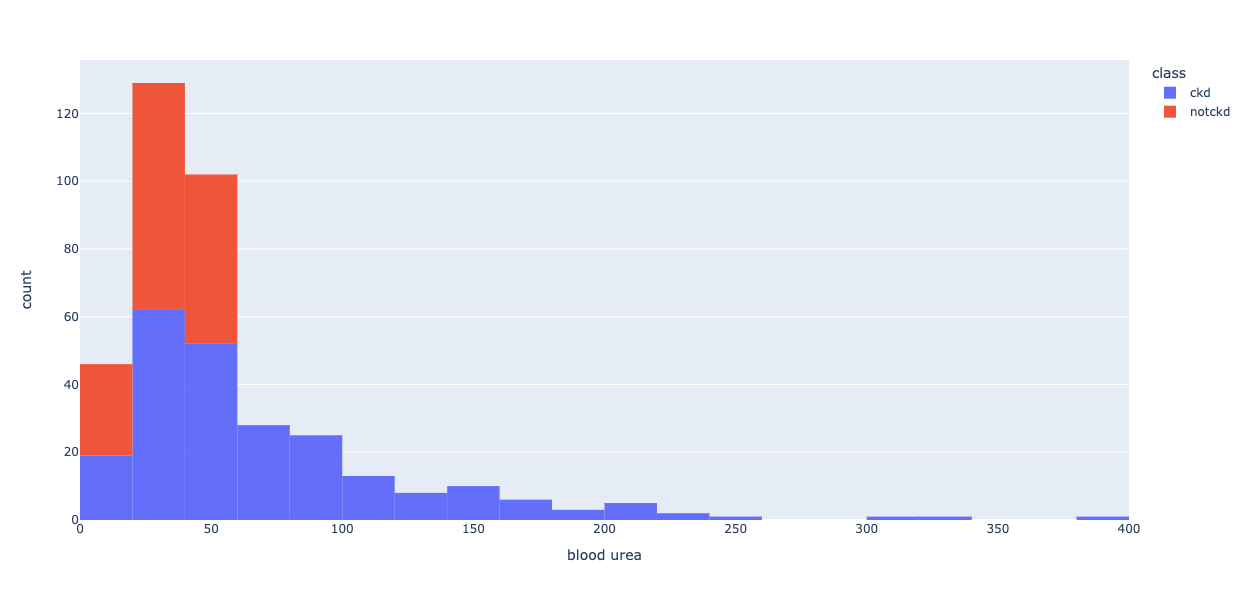

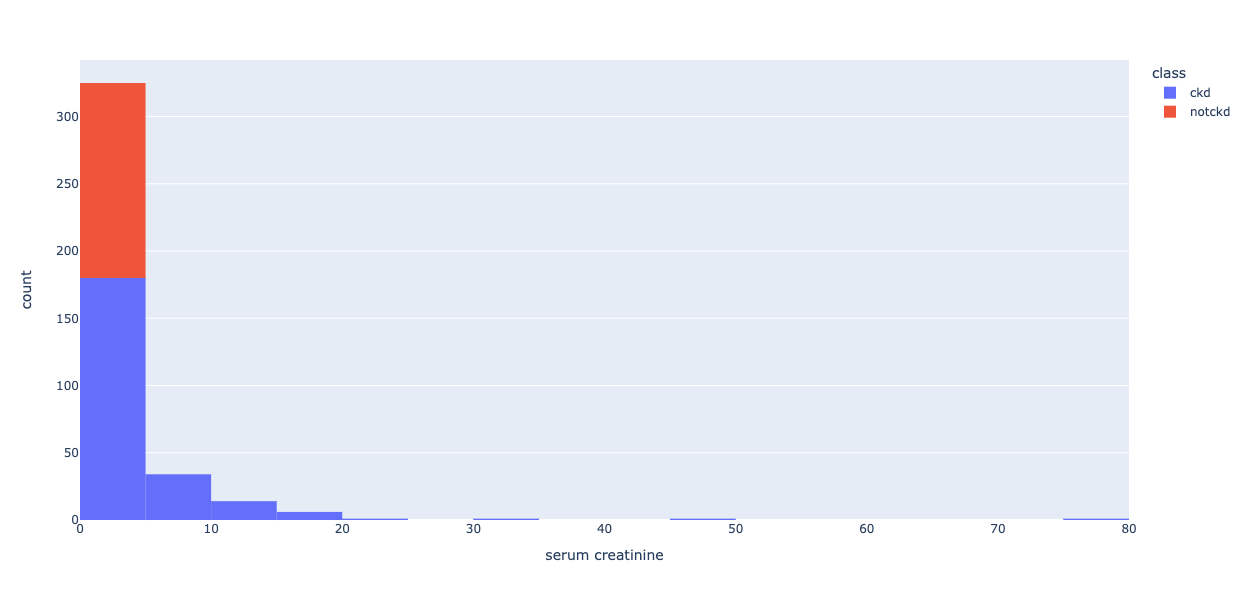

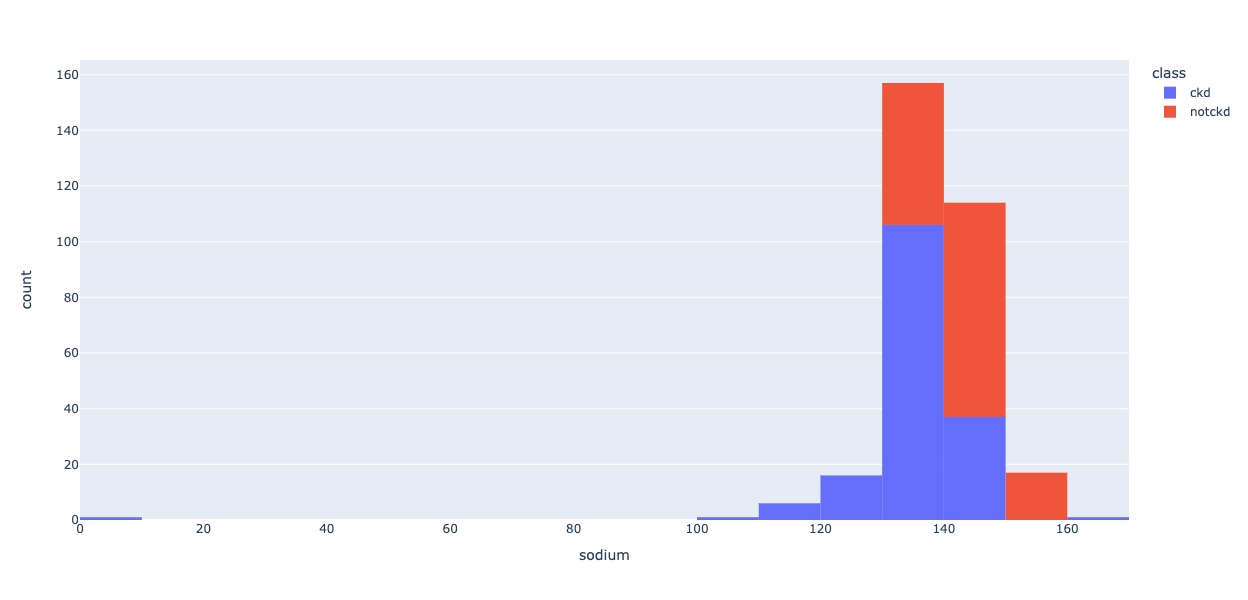

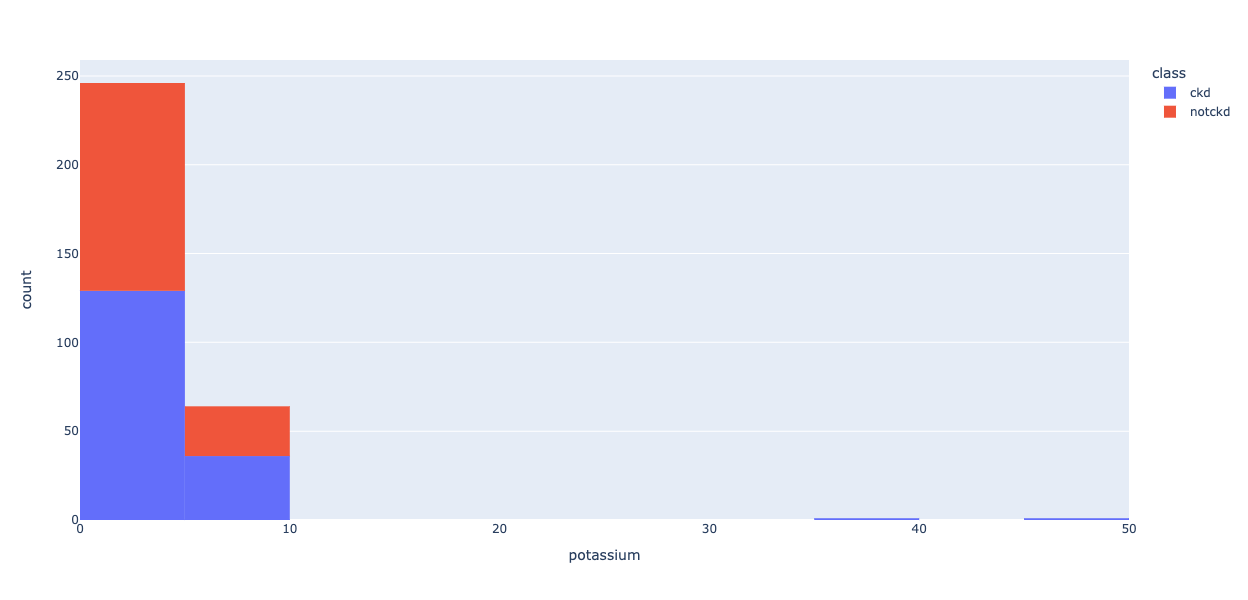

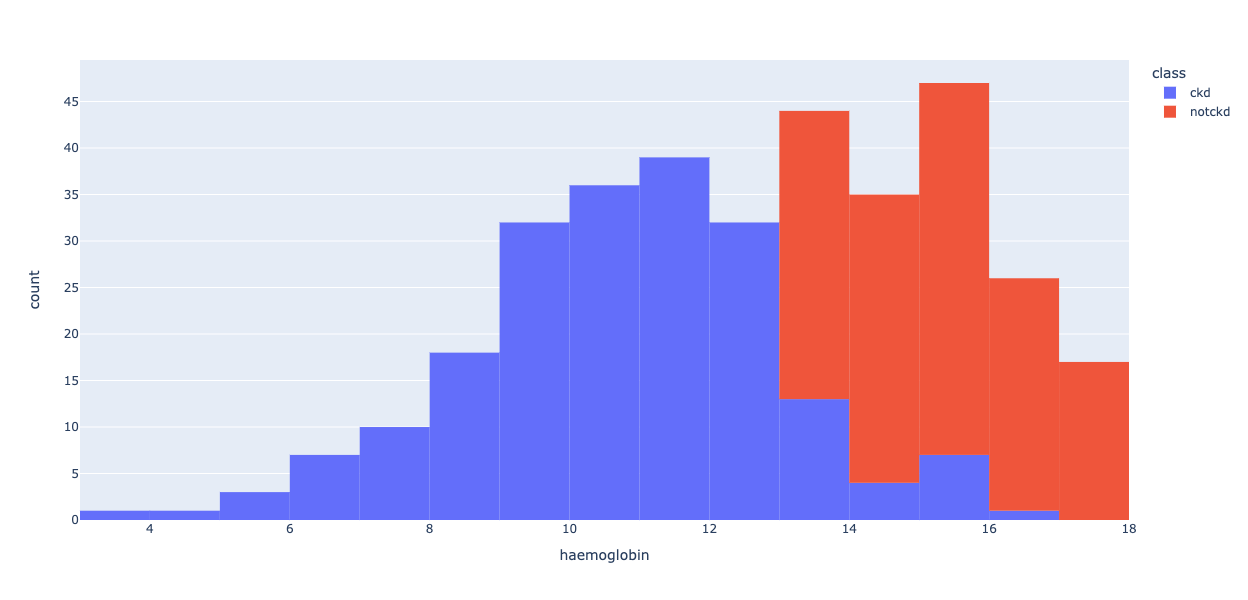

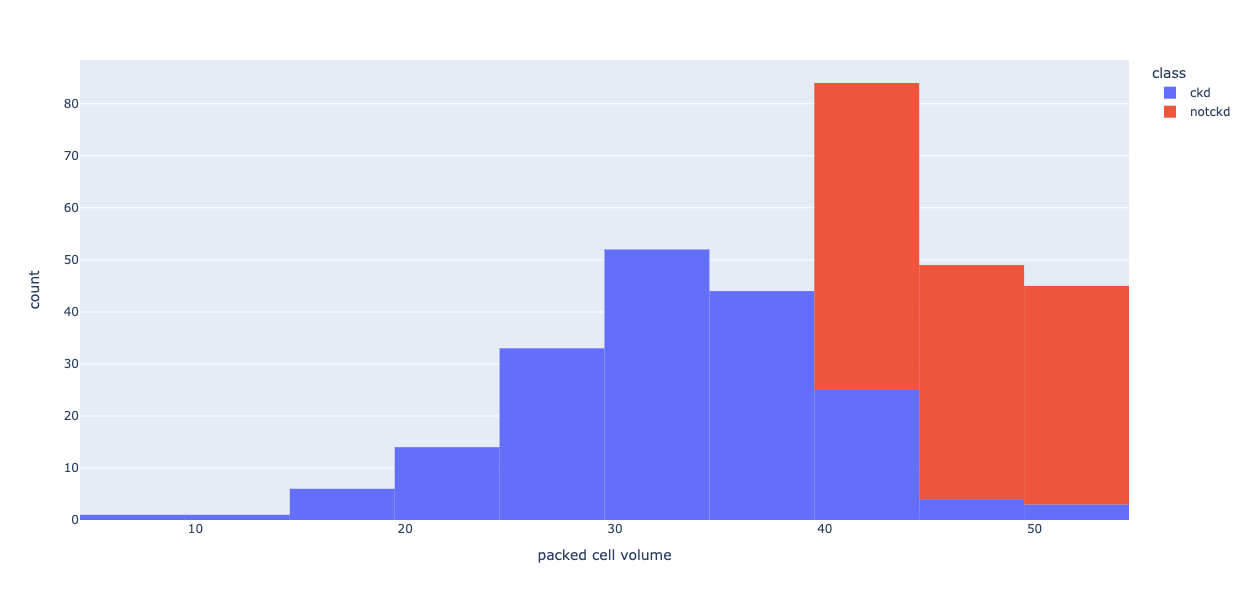

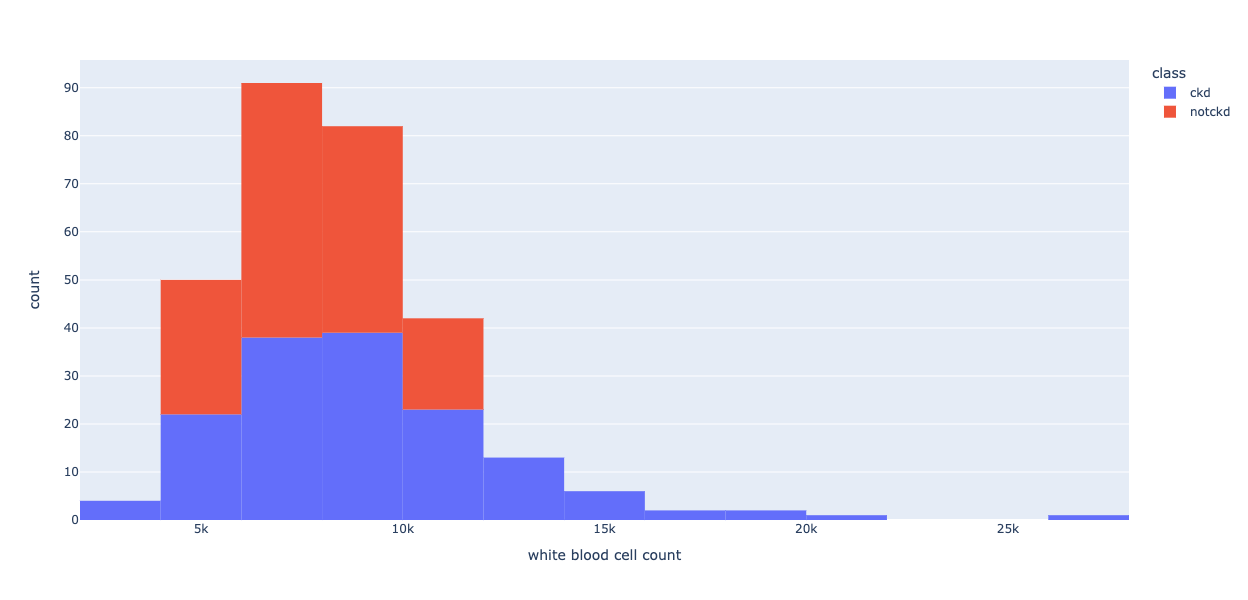

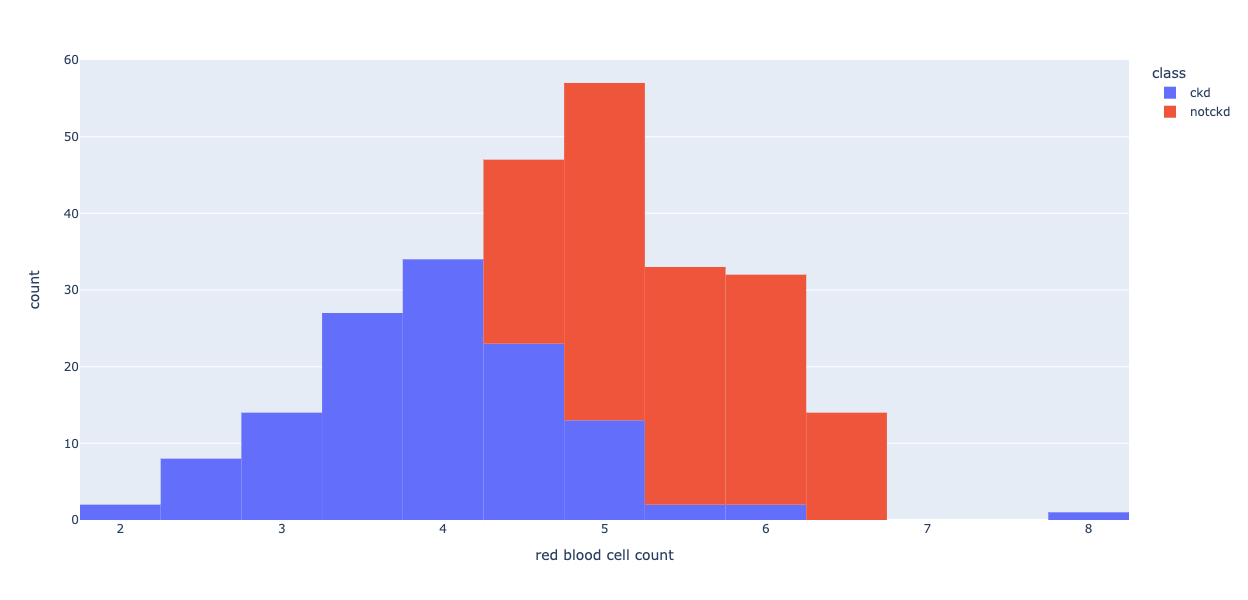

In [62]:
import plotly.express as px

for i,feature in enumerate(num_col):
    fig = px.histogram(df, x = feature, color = 'class', nbins = 20, height = 600, width = 800)
    fig.show()

### Categotical features

In [63]:
#len(categorical_values)

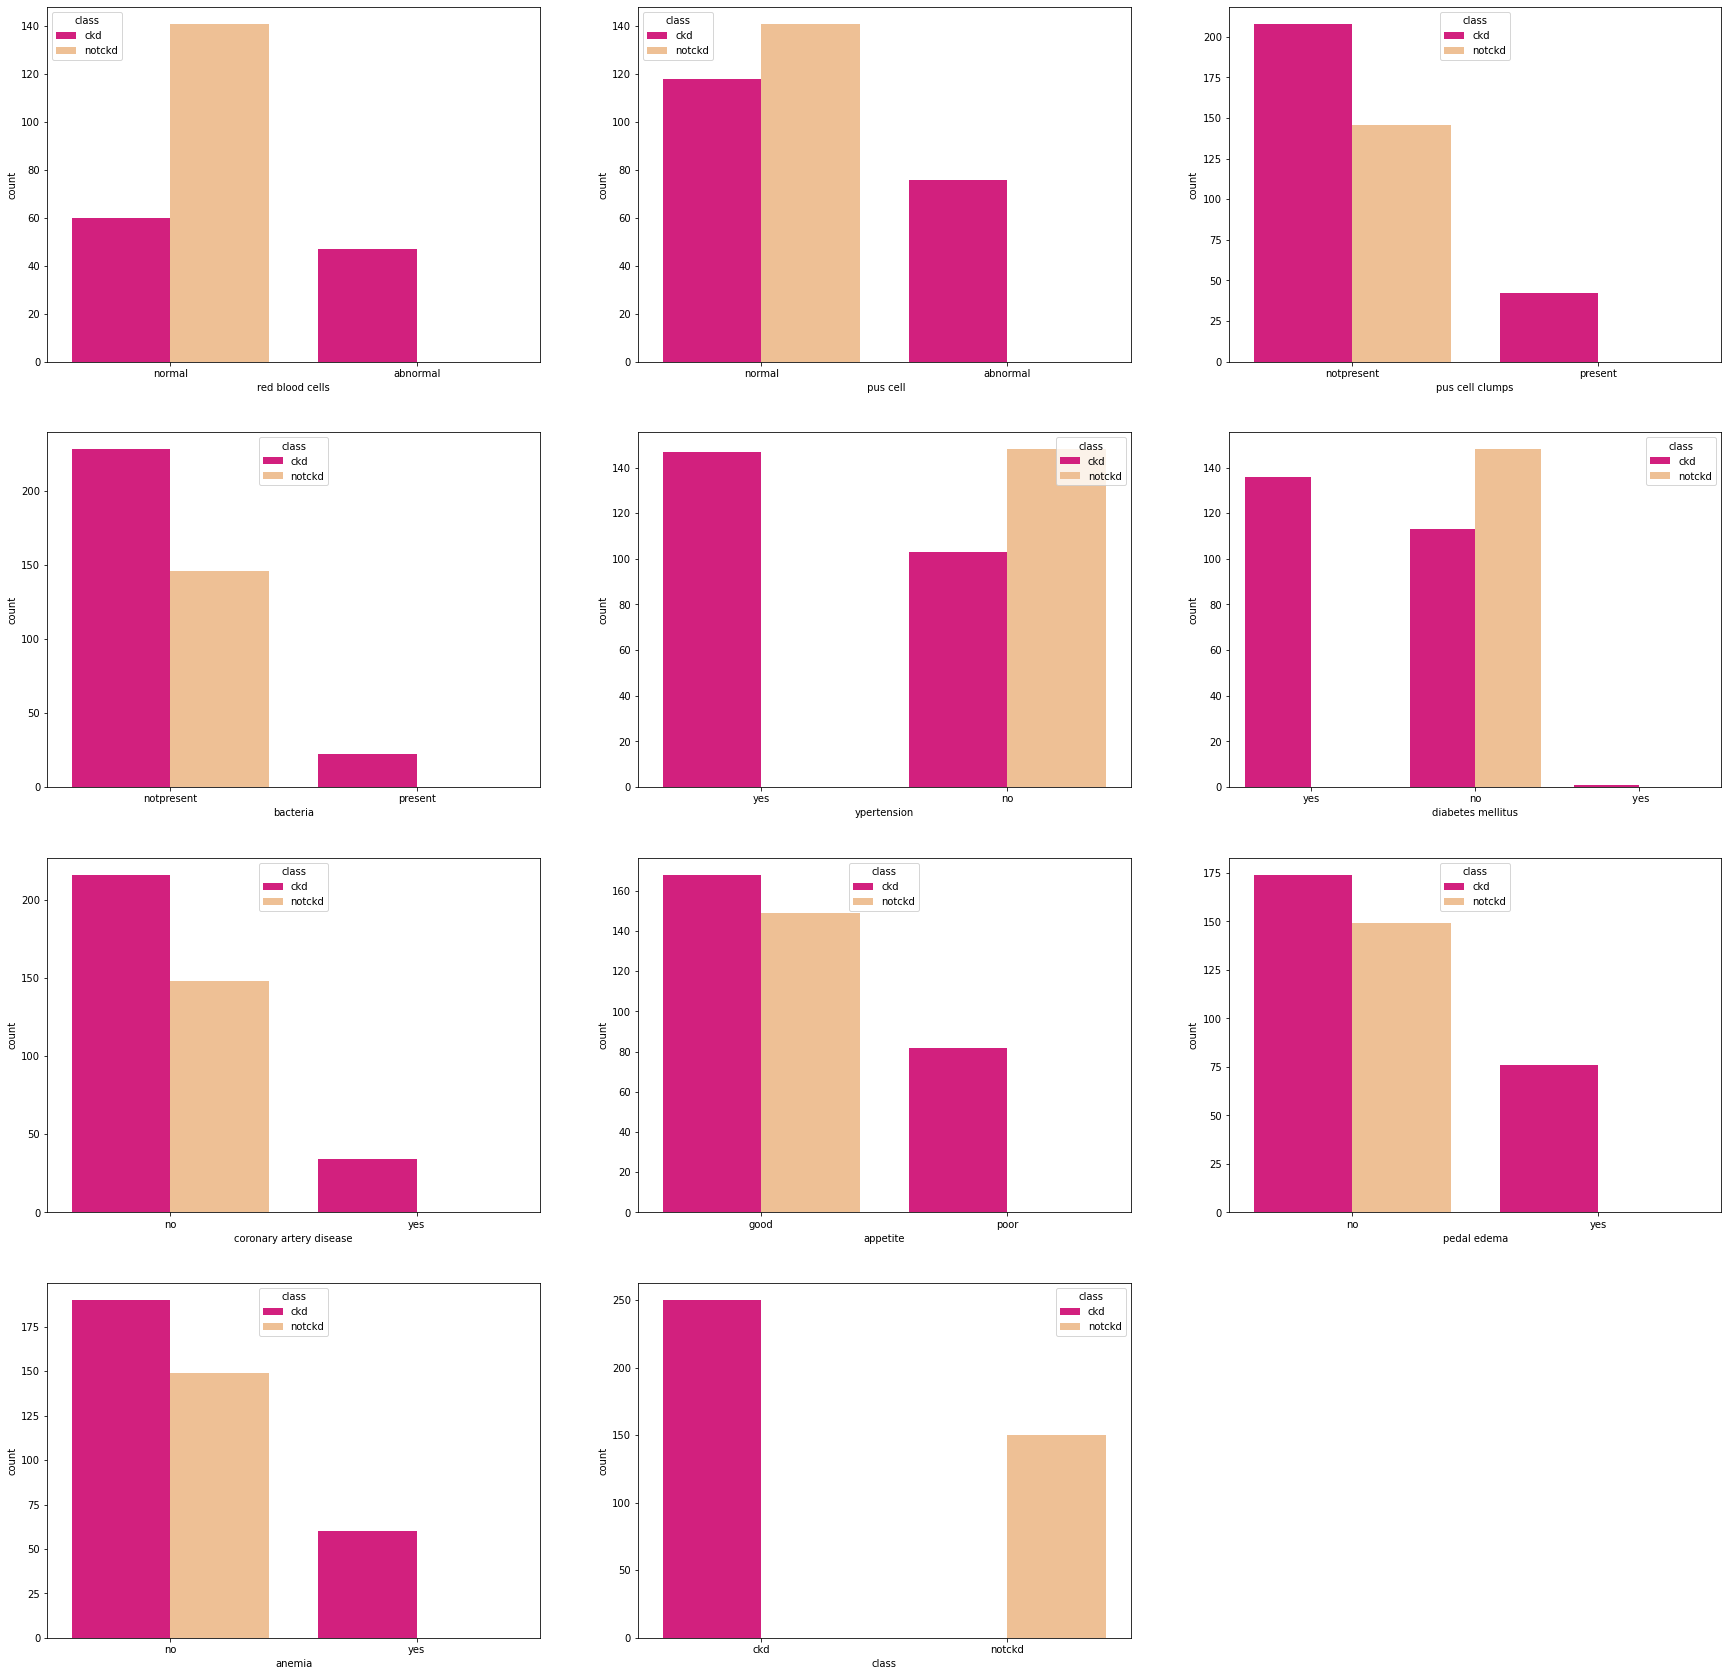

In [64]:
plt.figure(figsize = (30,30))


for i,features in enumerate(categorical_values):
    plt.subplot(4,3,i+1)
    sns.countplot(data = df, x =features, hue = 'class', palette='Accent_r')
    

# Bivariate analysis

In [65]:
#Checking correlation between numeric variables

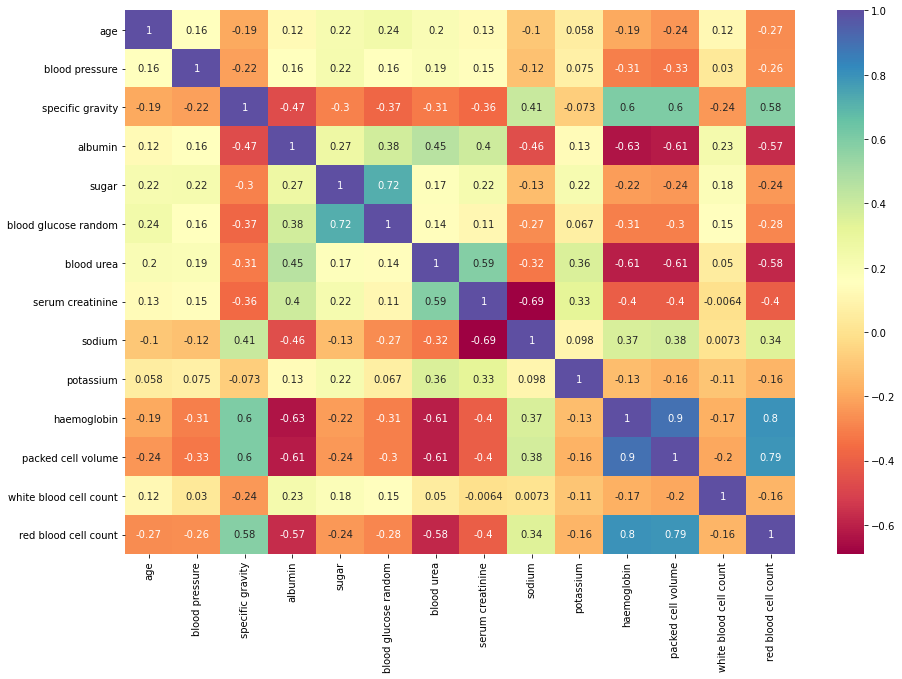

In [66]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Spectral')
plt.show()

#We can check the positive and negative correlation between the features

In [67]:
df.groupby(['red blood cells', 'class'])['red blood cell count'].agg(['count', 'mean', 'median', 'min', 'max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [68]:
#For the numerical features, lets use violin plots to find the distribution with target outcome

In [69]:
#num_col

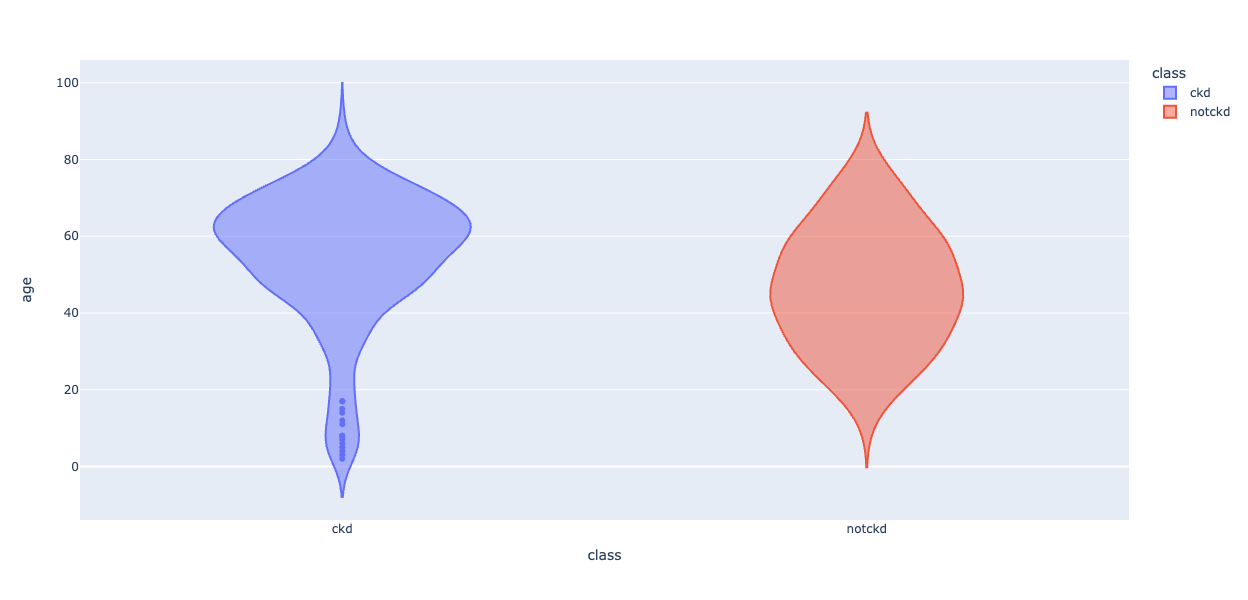

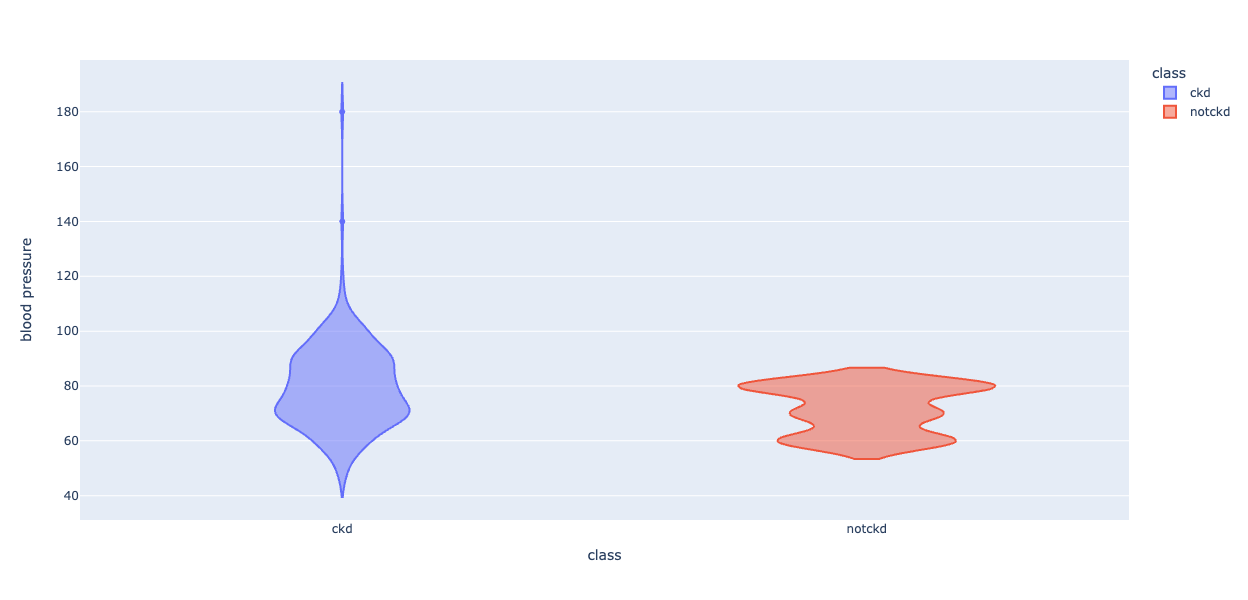

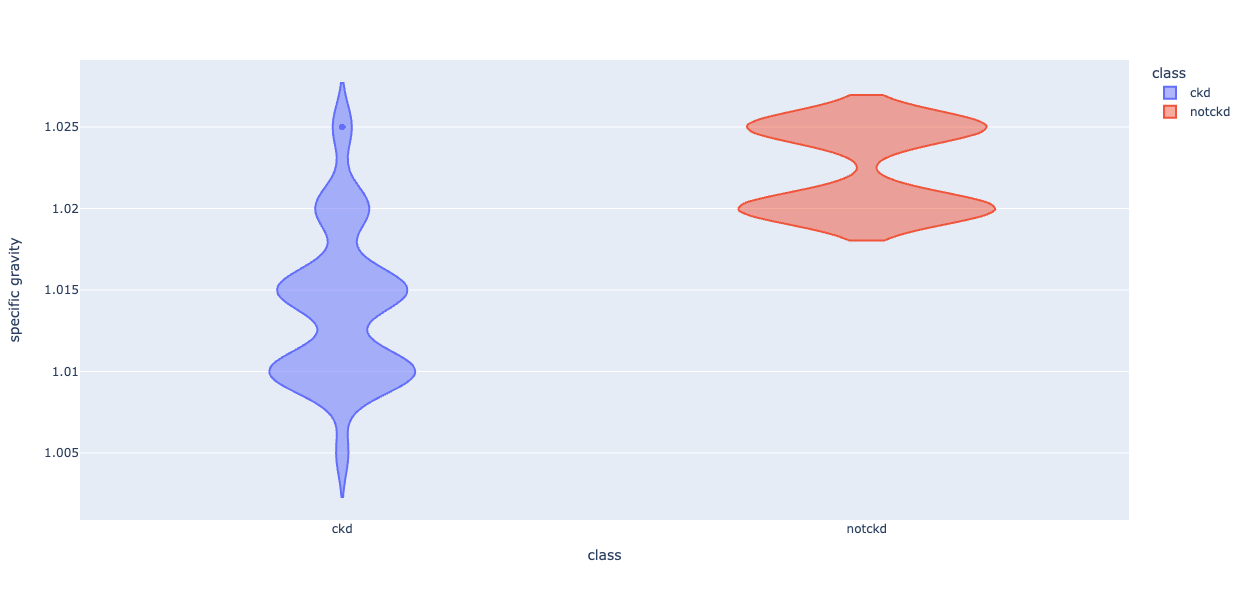

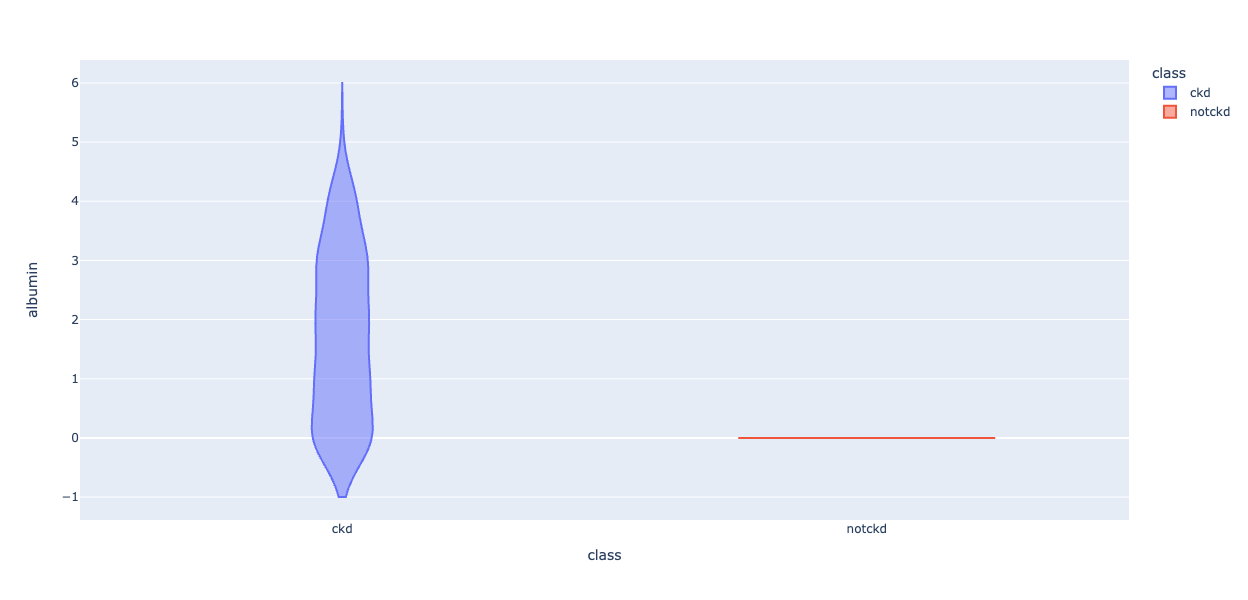

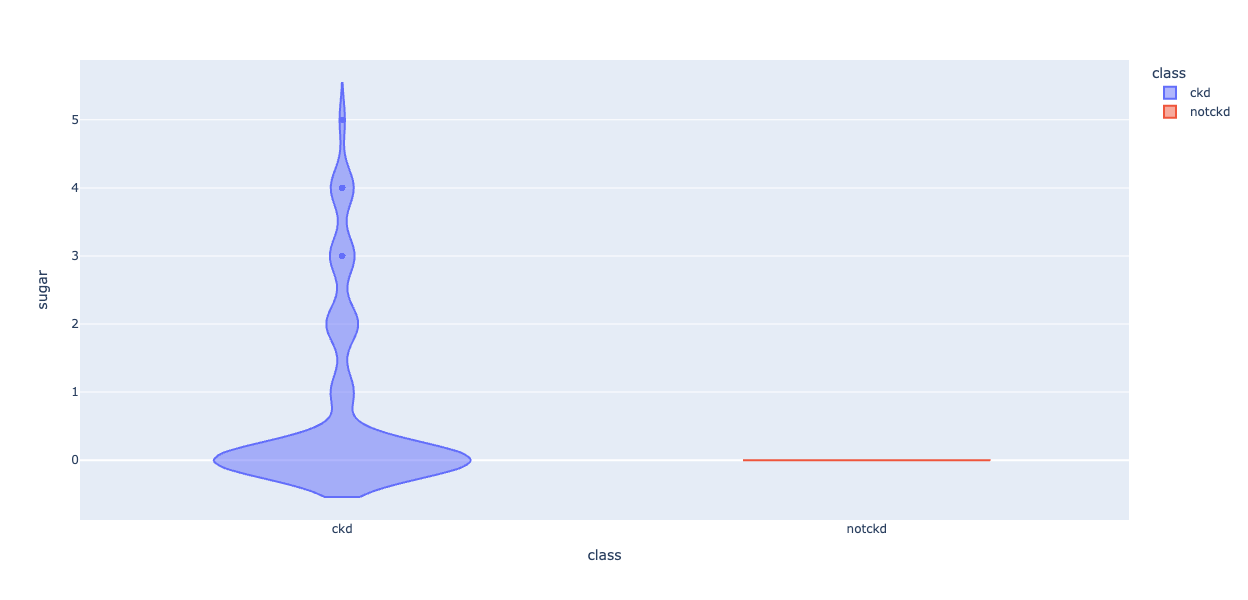

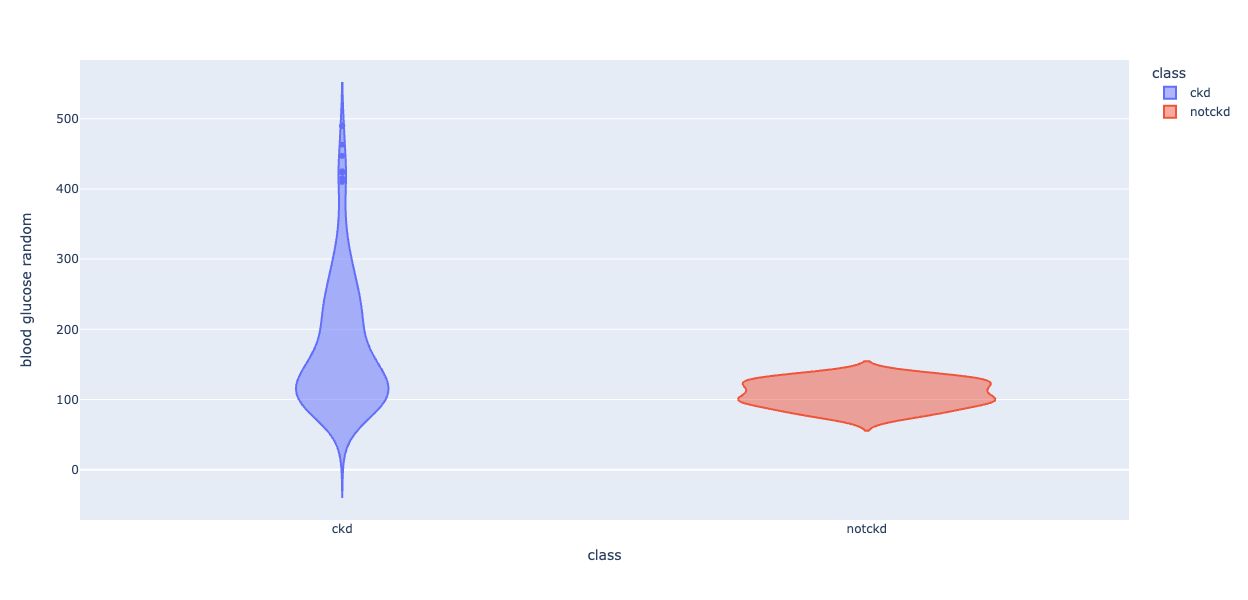

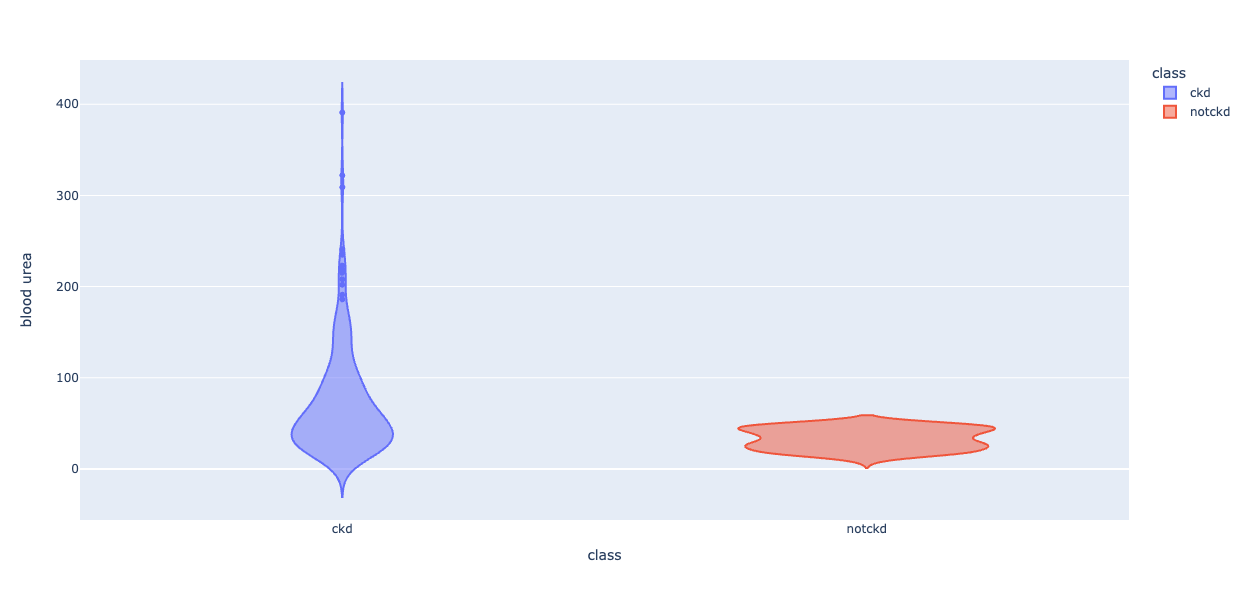

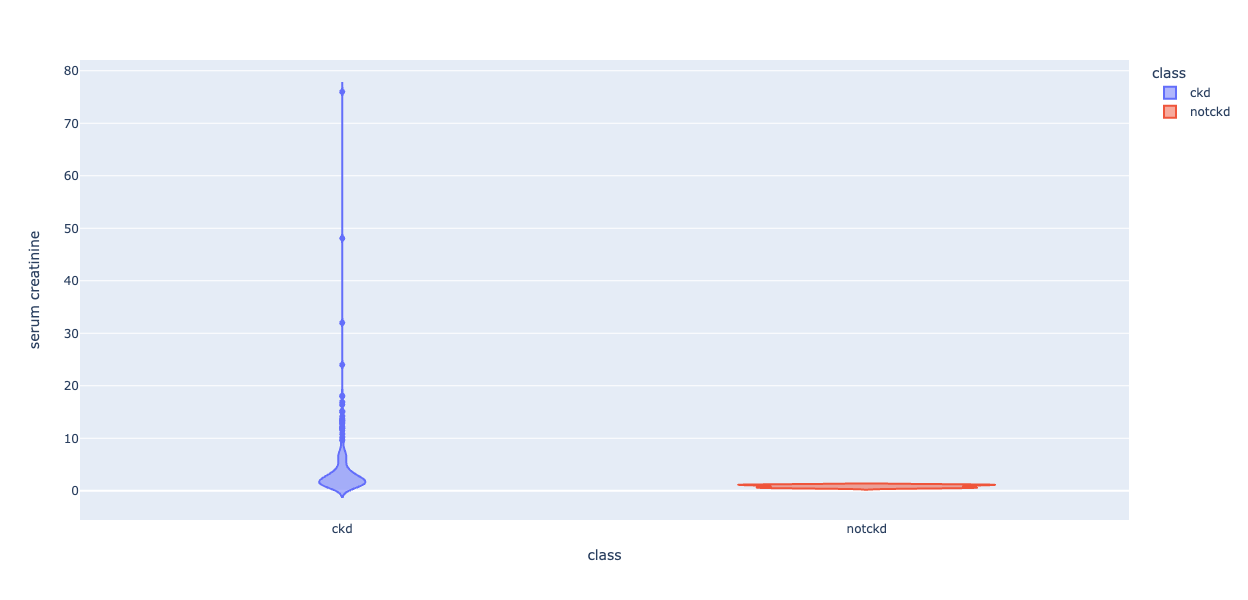

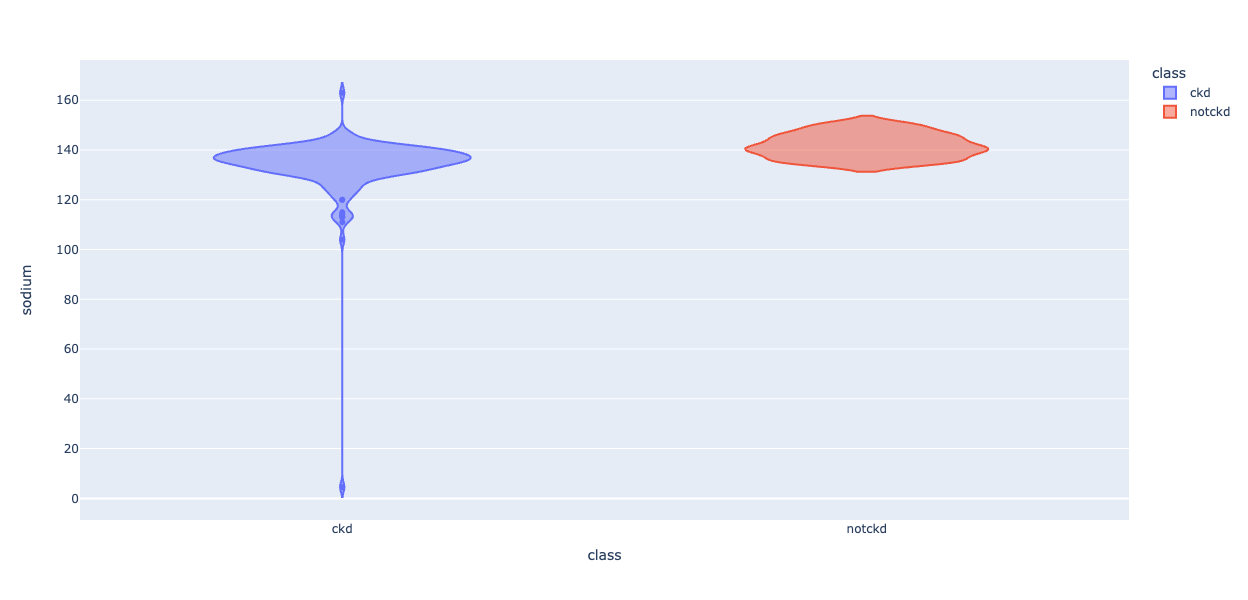

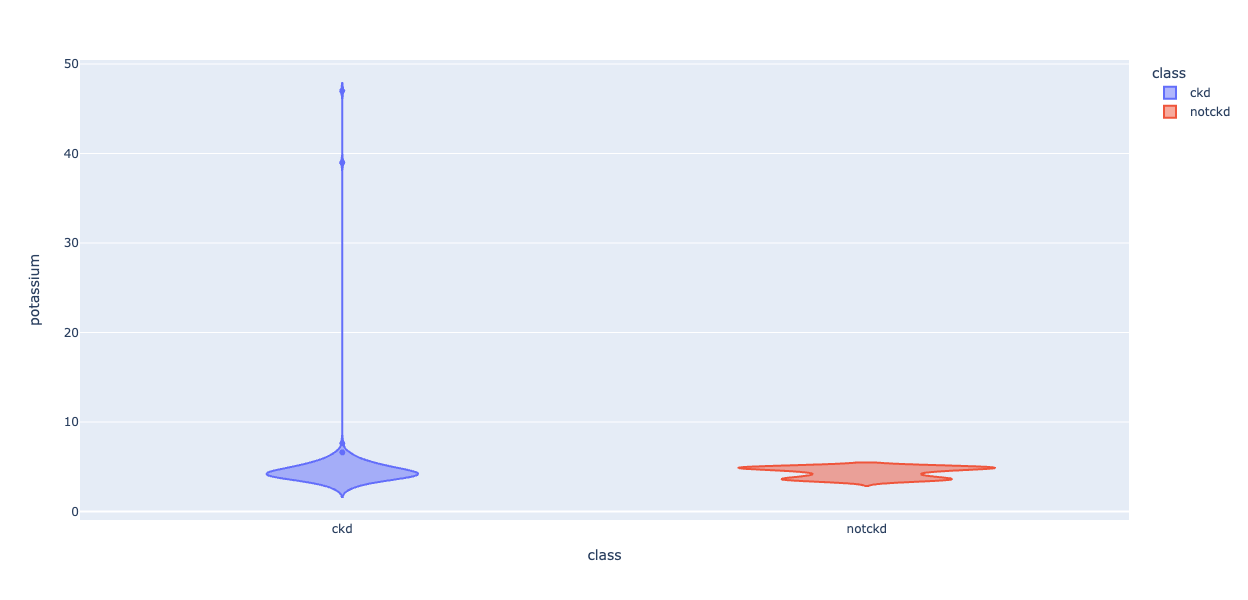

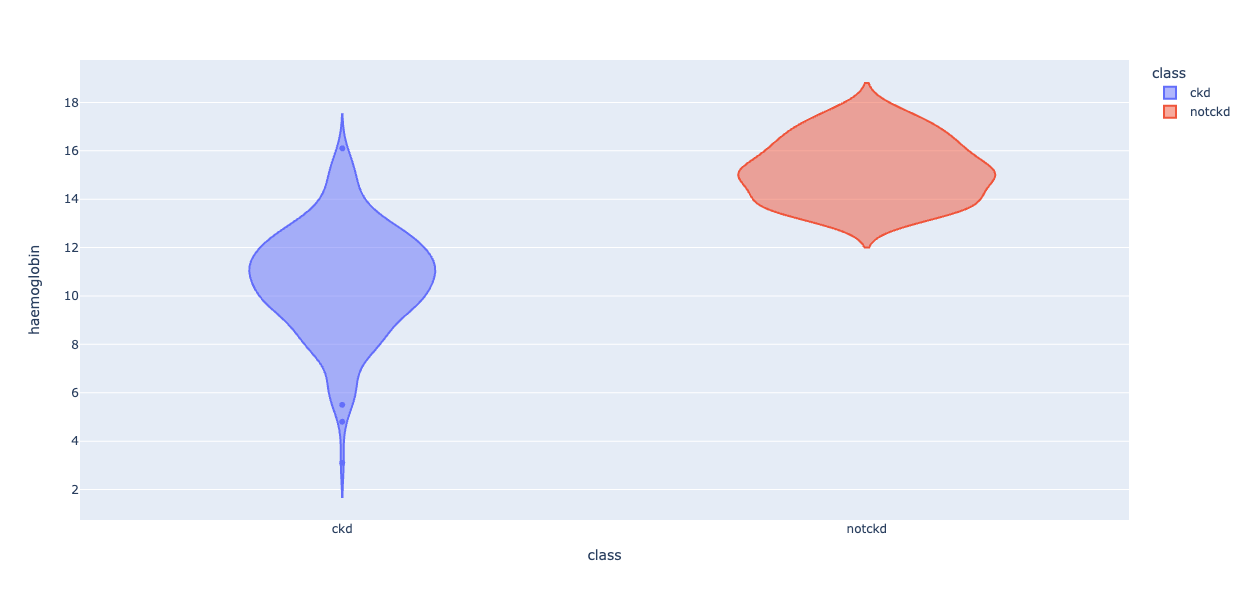

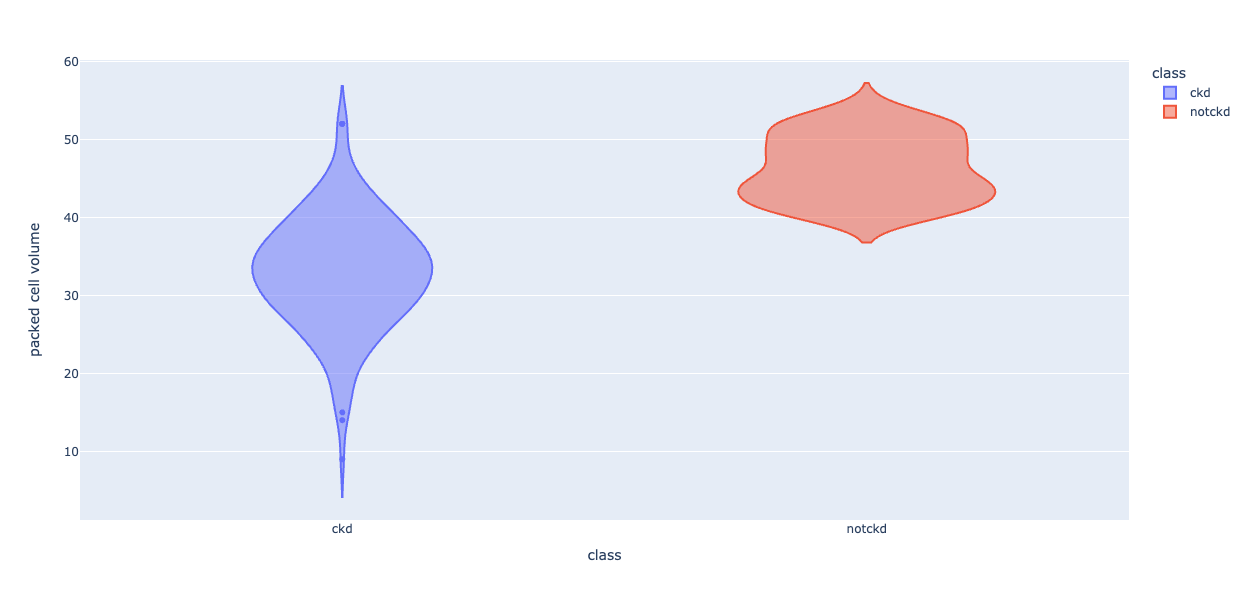

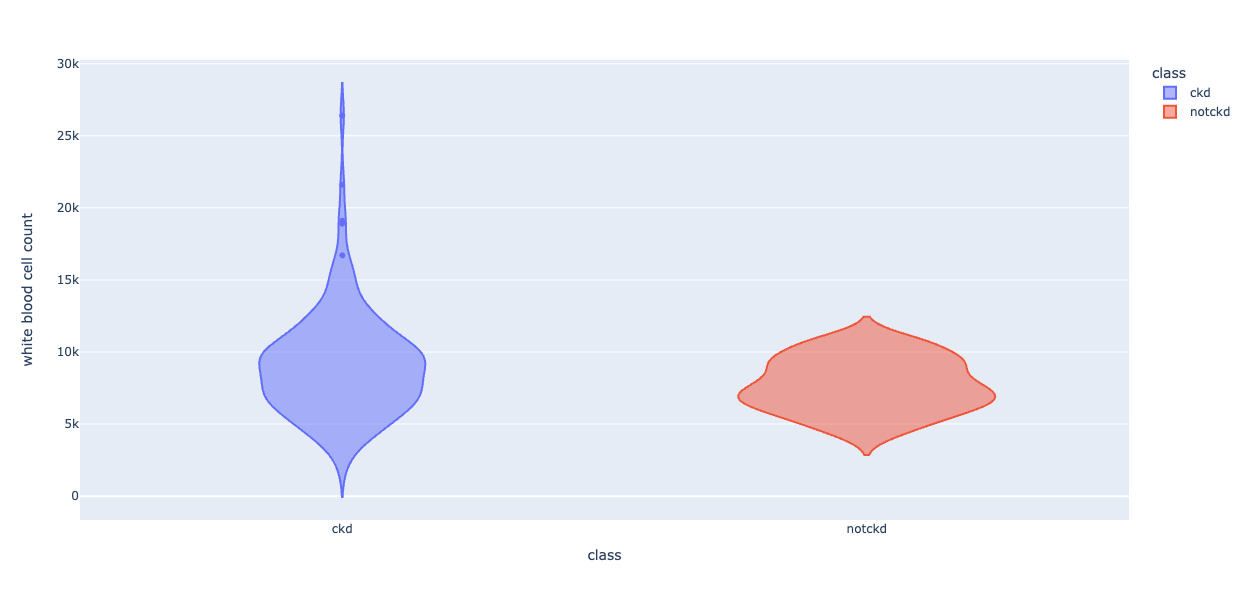

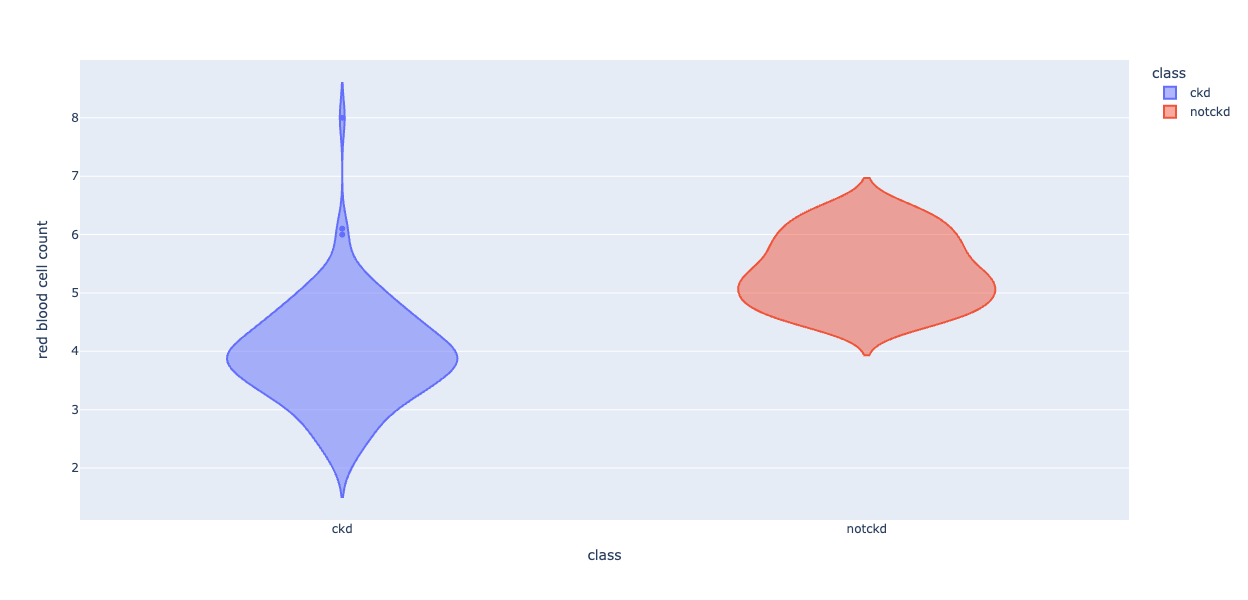

In [70]:
for i in (num_col):
    fig = px.violin(df, y = i, x = 'class', color = 'class', height = 600, width = 800)
    fig.show()
    

In [71]:
#Analyse the relationship b/w haemoglobin and packed cell volume

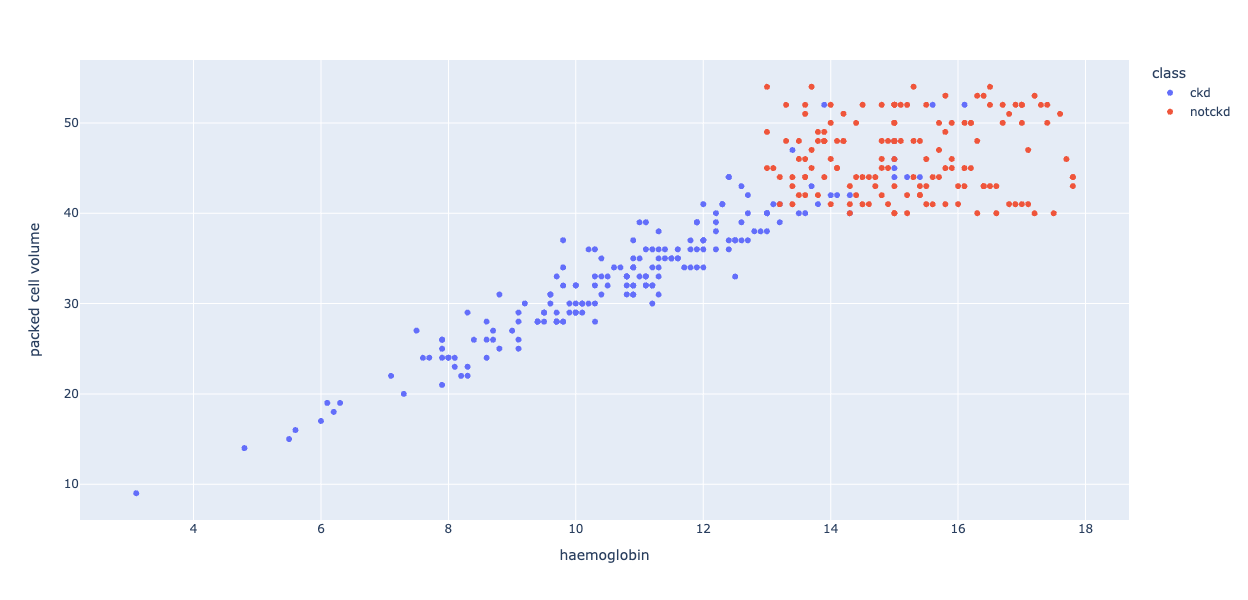

In [72]:
px.scatter(df, x= 'haemoglobin', y = 'packed cell volume', color = 'class', height = 600)

#There is a linerity in packed cell volume and haemoglobin

In [73]:
#Analyse red blood cell count in ckd and not ckd

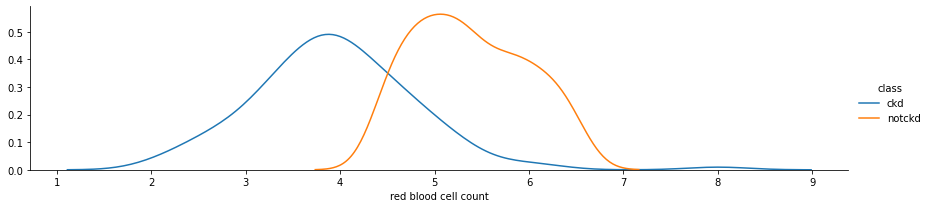

In [74]:
grid = sns.FacetGrid(df, hue = 'class', aspect=4)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

## Missing value treatment

In [75]:
df.isna().sum().sort_values(ascending = False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [77]:
#The problem: Huge number of missing values for several features, also, normal distribution has to be maintained

## Lets consider the scenario, wherever there is a missing value, replace it with a random value in that particular column

## Random value imputation does not affect the distribution of the data

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='red blood cells', ylabel='count'>

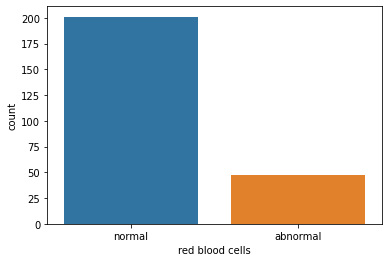

In [79]:
sns.countplot(df['red blood cells'])

Let's make a copy

In [80]:
data = df.copy()

In [81]:
data.head()

age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   ypertension  diabetes mellitus  coronary artery disease  appetite  \
0          yes                yes                       no      good   
1           no                 no                       no      good   
2           no                yes                       no      poor   
3          yes                 no                       no      poor   
4           no                 no                       no      good   

   pedal edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

In [83]:
data['red blood cells'].dropna().sample()

374    normal
Name: red blood cells, dtype: object

In [84]:
data['red blood cells'].isnull().sum()

152

In [86]:
random_sample = data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())

In [87]:
random_sample

171      normal
379      normal
251      normal
303      normal
14       normal
         ...   
273      normal
49       normal
370      normal
143    abnormal
391      normal
Name: red blood cells, Length: 152, dtype: object

In [88]:
data[data['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [89]:
random_sample.index

Int64Index([171, 379, 251, 303,  14,  61, 158, 311, 294,  36,
            ...
             84, 250, 398, 274, 186, 273,  49, 370, 143, 391],
           dtype='int64', length=152)

In [90]:
#We need to match the values with the respective indexes

In [91]:
random_sample.index = data[data['red blood cells'].isnull()].index

In [92]:
random_sample

0        normal
1        normal
5        normal
6        normal
10       normal
         ...   
309      normal
322      normal
349      normal
350    abnormal
381      normal
Name: red blood cells, Length: 152, dtype: object

In [93]:
data.loc[data['red blood cells'].isnull(), 'red blood cells'] = random_sample

In [95]:
data['red blood cells'].isnull().sum()

0

## Now we define a function to replicate the process for all the features

In [97]:
def missing_values_imputer(df, feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature]=random_sample

In [105]:
missing_features = df.isna().sum().index.tolist()

In [107]:
for i in missing_features:
    missing_values_imputer(data, i)

/Users/anshumantewary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='red blood cells', ylabel='count'>

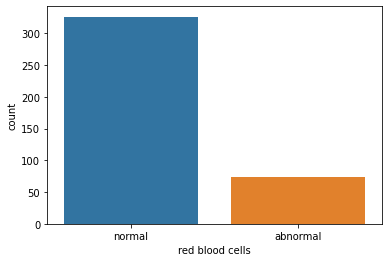

In [112]:
sns.countplot(data['red blood cells'])

#The count ratio is still same

In [116]:
df['class'].mode()[0]

'ckd'

In [117]:
#Lets say I want to impute mode values to my categorical data

def categorical_imputer(df, feature):
    mode = df[feature].mode()[0]
    df[feature].fillna(mode, inplace = True)

# FEATURE ENCODING

In [118]:
for i in categorical_values:
    print('{} has {} categories'.format(i, data[i].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


## Since the number of unique values is low, we are going ahead with Label Encoding:


In [120]:
from sklearn.preprocessing import LabelEncoder

In [122]:
le = LabelEncoder()

In [123]:
for column in categorical_values:
    data[column] = le.fit_transform(data[column])
    

In [124]:
data['class']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

## Selecting best features

In [125]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [156]:
X = data.drop('class', axis = 1)

In [157]:
y = data['class']

In [158]:
Ordered_rank_features = SelectKBest(score_func=chi2, k=20)

In [159]:
ordered_features = Ordered_rank_features.fit(X,y)

In [160]:
ordered_features

SelectKBest(k=20, score_func=<function chi2 at 0x7fa7c8211310>)

In [161]:
ordered_features.scores_

array([1.18391943e+02, 7.96659049e+01, 5.41684074e-03, 2.38163317e+02,
       1.09800000e+02, 9.36523517e+00, 1.31418803e+01, 2.52000000e+01,
       1.32000000e+01, 2.46640129e+03, 2.42128246e+03, 3.54322160e+02,
       2.25274996e+01, 1.38194208e-01, 1.20886737e+02, 3.27424299e+02,
       1.51503908e+04, 2.00448713e+01, 8.56288288e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [162]:
datascores = pd.DataFrame(ordered_features.scores_, columns = ['Score'])

In [163]:
datascores['Features'] = X.columns.values

In [170]:
#Lets reorder the columns

In [171]:
cols = ['Features', 'Score']

In [172]:
datascores = datascores[cols]

In [173]:
datascores.sort_values('Score', ascending = False)

Features         Score
16   white blood cell count  15150.390818
9      blood glucose random   2466.401295
10               blood urea   2421.282462
11         serum creatinine    354.322160
15       packed cell volume    327.424299
3                   albumin    238.163317
14              haemoglobin    120.886737
0                       age    118.391943
4                     sugar    109.800000
18              ypertension     85.628829
1            blood pressure     79.665905
21                 appetite     49.200000
22              pedal edema     45.600000
23                   anemia     36.000000
7           pus cell clumps     25.200000
12                   sodium     22.527500
19        diabetes mellitus     20.439252
20  coronary artery disease     20.400000
17     red blood cell count     20.044871
8                  bacteria     13.200000
6                  pus cell     13.141880
5           red blood cells      9.365235
13                potassium      0.138194
2          specific gravity      0.005417

## Selecting Top10 features

In [177]:
datascores.nlargest(10, 'Score')['Features'].tolist()

['white blood cell count',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'packed cell volume',
 'albumin',
 'haemoglobin',
 'age',
 'sugar',
 'ypertension']

In [178]:
top_10_features = datascores.nlargest(10, 'Score')['Features'].tolist()

In [179]:
top_10_features

['white blood cell count',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'packed cell volume',
 'albumin',
 'haemoglobin',
 'age',
 'sugar',
 'ypertension']

In [181]:
x_new = data[top_10_features]

In [182]:
x_new.head()

white blood cell count  blood glucose random  blood urea  serum creatinine  \
0                  7800.0                 121.0        36.0               1.2   
1                  6000.0                 139.0        18.0               0.8   
2                  7500.0                 423.0        53.0               1.8   
3                  6700.0                 117.0        56.0               3.8   
4                  7300.0                 106.0        26.0               1.4   

   packed cell volume  albumin  haemoglobin   age  sugar  ypertension  
0                44.0      1.0         15.4  48.0    0.0            1  
1                38.0      4.0         11.3   7.0    0.0            0  
2                31.0      2.0          9.6  62.0    3.0            0  
3                32.0      4.0         11.2  48.0    0.0            1  
4                35.0      2.0         11.6  51.0    0.0            0

In [183]:
#However, there is still 1 problem:

In [184]:
#DATA IS IMBALANCED

In [185]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25)

In [186]:
x_train.shape

(300, 10)

In [187]:
#Let's check for imbalance

In [188]:
y_train.value_counts()

0    188
1    112
Name: class, dtype: int64

## Using XGBoost to train the model

In [190]:
#! pip install xgboost

     |████████████████████████████████| 1.8 MB 8.1 MB/s eta 0:00:01


In [191]:
from xgboost import XGBClassifier

In [195]:
clf = XGBClassifier()

In [193]:
params = {'learning_rate':[0.05, 0.20, 0.25],
          'max_depth': [ 5, 10, 100],
          'min_child_weight':[1,3,5,7],
          'gamma':[0.0, 0.1, 0.2, 0.4],
          'colsample_bytree':[0.3, 0.4, 0.7]
         }

In [198]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv = 10, verbose = 3)

In [199]:
random_search.fit(x_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.05, 0.2, 0.25],
                                        'max_depth': [5, 10, 100],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [200]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [201]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [247]:
clf_new = random_search.estimator

In [248]:
clf_new

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [249]:
clf_new.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [250]:
y_pred = clf_new.predict(x_test)

In [257]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [252]:
confusion_matrix(y_test, y_pred)

array([[62,  0],
       [ 2, 36]])

In [253]:
accuracy_score(y_test, y_pred)

0.98

In [254]:
#!pip install scikit-plot
#To plot TPR and FPR, recall and sensitivity

In [259]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = auc(fpr, tpr)

In [242]:
from sklearn.metrics import RocCurveDisplay

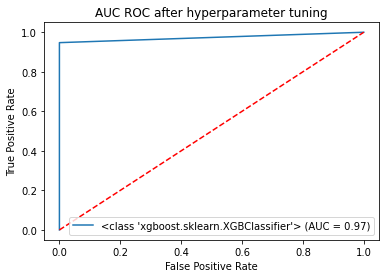

In [266]:
(RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=auc, estimator_name=XGBClassifier)).plot()
plt.plot([0,1], [0,1], "r--")
plt.title("AUC ROC after hyperparameter tuning")
plt.show()
